<a href="https://colab.research.google.com/github/Amoghakrao/Netflix-movies-and-tv-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_AMOGHA_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **IMPORTING LIBRARIES AND DATA**

In [45]:

# Create new features to store date, day, month and year seperately.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  # First convert date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Compute day.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Compute year.
netflix_data['month_added'] = netflix_data['date_added'].dt.month #IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [46]:
#YELLOWBRICK IS A SUITE OF VISUALIZATION AND DIAGNOSTIC TOOLS THAT WILL ENABLE QUICKER MODEL SELECTION
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [49]:
#LET'S MOUNT THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#LET'S LOAD THE DATA
netflix_data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - AMOGHA K/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Data Preparation**

In [51]:
#LET'S SEE  THE FIRST FIVE ROWS OF THE DATASET 
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [52]:
#LET'S SEE  THE LAST FIVE ROWS OF THE DATASET 
netflix_data.tail()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [53]:
#CHECK THE TOTAL ROWS AND COLUMNS IN THE DATASET.
print(f' THE SHAPE OF DATASET IS {(netflix_data.shape)} \n TOTAL ROWS ARE : {(netflix_data.shape)[0]}\n TOTAL COLUMNS ARE : {(netflix_data.shape)[1]}')

 THE SHAPE OF DATASET IS (7787, 12) 
 TOTAL ROWS ARE : 7787
 TOTAL COLUMNS ARE : 12


In [54]:
#THE INFO() METHOD PRINTS INFORMATION ABOUT THE DATA.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* **Our data includes only one numerical type of data and the rest is all categorical data.**
* **Our data has 7877 rows and 12 columns.**

In [55]:
# CHECKING FOR COLUMNS
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [56]:
#CHECKING THE NULL VALUES IN OUR DATA
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

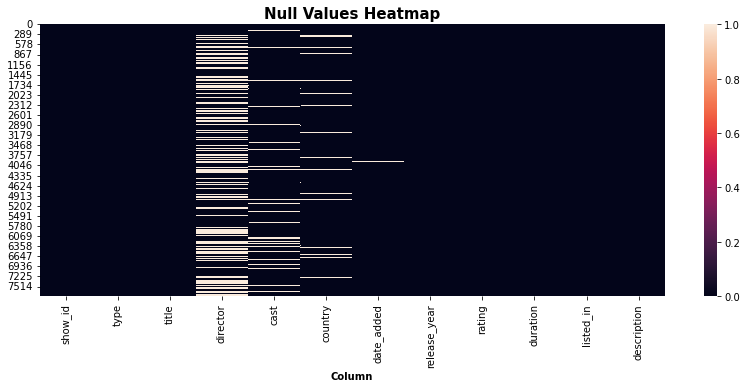

In [57]:
#USING A HEAT-MAP TO SHOW NULL VALUES COUNT
plt.figure(figsize=(14, 5))
sns.heatmap(netflix_data.isnull())
plt.title('Null Values Heatmap',fontweight="bold",size=15)
plt.xlabel('Column',fontweight="bold")
plt.show()

In [58]:
#CHECKING THE PERCENTAGE OF COLUMNS WITH NULL VALUES 
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [59]:
#LET'S CHECK FOR DUPLICATED ENTRIES.
netflix_data.duplicated().sum()

0

* **There is no duplicate value in our data**



In [60]:
#LET'S CHECK THE STATISTICAL INFORMATION OF DATA
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# TOTAL NULL VALUES
netflix_data.isnull().sum().sum()

3631

* **There are 3631 null values in the dataset, 2389 null values in the director column, 718 null values in the cast column, 507 null values in the country column, 10 in date_added, and 7 in rating. so we need to handle the null values.**

In [62]:
#TREATMENT OF NULL VALUES
netflix_data['director'].fillna('No Director', inplace=True)
netflix_data['cast'].fillna('No Cast', inplace=True)
netflix_data['country'].fillna('Country Unavailable', inplace=True)


* **For the Director column, we filled in null values as 'No director', and for the Cast column, we filled in 'No cast' and country as 'country unavailability'.**

In [63]:
#AFTER TREATMENT OF NULL VALUES
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [64]:
#REMOVING THE DTAE_ADDEED AND RATING COLUMN
netflix_data.dropna(subset=['date_added','rating'],inplace=True)

**The other two columns, "date_added" and "rating," contain an insignificant portion of the data, so we can  drop them from the dataset.**

In [65]:
#CHECKING  THE SHAPE OF OUR DATA AFTER NULL VALUE TREATMENT
netflix_data.shape

(7770, 12)

In [66]:
#CREATING NEW FEATURES TO STORE DATE, DAY, MONTH, AND YEAR SEPARATELY.
#CONVERT DATE_ADDED TO DATE TIME FORMAT FIRST.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added']) 

#ADDING DAY
netflix_data['day_added'] = netflix_data['date_added'].dt.day

#ADDING YEAR
netflix_data['year_added'] = netflix_data['date_added'].dt.year

#ADDING MONNTH
netflix_data['month_added'] = netflix_data['date_added'].dt.month

In [67]:

#checking for head after seperating date ,month,year
netflix_data[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


* **We have imported the Netfliex data set, and we saw that we had null values. We have handled all null data points, and our data is ready for EDA. Now we can dive into EDA and modeling.**

# **Exploratory Data Analysis**